In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_table('Data_28_F29.txt', delimiter=',')

In [3]:
df.columns.values

array(['FID', 'ID', 'FIELD', 'OID_1', 'YLD00', 'YLD01', 'YLD02', 'YLD03',
       'AVGYLD', 'ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP',
       'BAND1', 'BAND2', 'BAND3', 'BAND4', 'VI00_520', 'VI00_528',
       'VI00_613', 'VI00_707', 'VI00_715', 'VI00_723', 'VI00_816',
       'VI00_824', 'VI00_901', 'VI00_917', 'VI01_616', 'VI01_624',
       'VI01_710', 'VI01_827', 'VI01_912', 'VI02_518', 'VI02_526',
       'VI02_619', 'VI02_713', 'VI02_721', 'VI02_830', 'VI02_907',
       'VI02_923', 'VI03_505', 'VI03_529', 'VI03_606', 'VI03_622',
       'VI03_724', 'VI03_825', 'VI03_926', 'STD00', 'STD01', 'STD02',
       'STD03', 'CV', 'M3_00', 'M3_01', 'M3_02', 'M3_03', 'M3_AV',
       'CL_AV', 'CL_00', 'CL_01', 'CL_02', 'CL_03'], dtype=object)

In [4]:
columns = ['FIELD','YLD00','YLD01','YLD02','YLD03','AVGYLD','ELE','SLOPE','CURV',
           'PRO','PLAN','EC_SH','EC_DP','BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
ndvi_cols = ['VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
ndvi00_cols = ['VI00_520','VI00_528', 'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917']
band_cols = ['BAND1','BAND2','BAND3','BAND4']
soil_cols = ['ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP']
yld_cols = ['YLD00','YLD01','YLD02','YLD03','AVGYLD']
combined_cols = ['BAND1','BAND2','BAND3','BAND4', 'ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP',
                'VI00_520','VI00_528', 'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917']

In [5]:
df_use = df[columns]
df_use.head()

,FIELD,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,SLOPE,CURV,PRO,...,VI02_830,VI02_907,VI02_923,VI03_505,VI03_529,VI03_606,VI03_622,VI03_724,VI03_825,VI03_926
0,C29,1012.799988,1201.900024,943.599976,1082,1060.099976,1080.06,0.0879,0.002694,-0.001178,...,0.359116,0.273810,0.026178,-0.042553,-0.215094,-0.157303,-0.136364,-0.021505,0.128571,0.085366
1,C29,930.000000,1352.000000,1033.099976,1202,1129.199951,1080.08,0.0575,0.001403,-0.000473,...,0.439560,0.345238,0.096774,-0.053763,-0.220974,-0.169399,-0.163842,-0.010870,0.144828,0.144578
2,C29,902.000000,1389.400024,1073.699951,1196,1140.300049,1080.10,0.0906,-0.004624,0.004098,...,0.445652,0.345238,0.124324,-0.057592,-0.219331,-0.170213,-0.184358,-0.016043,0.140940,0.111111
3,C29,931.900024,1348.099976,1042.400024,1120,1110.599976,1080.13,0.1291,-0.001335,0.001011,...,0.425532,0.345238,0.104167,-0.071429,-0.236364,-0.165775,-0.169399,0.005405,0.120000,0.135135
4,C29,885.000000,1301.199951,978.400024,1119,1070.800049,1080.18,0.1515,0.002538,-0.001229,...,0.387097,0.321637,0.094737,-0.066667,-0.226277,-0.183246,-0.169399,-0.005291,0.099338,0.069767


In [6]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt

def compute_score(clf, X, y, scoring='mean_squared_error'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def plot_roc(x_test, y_test, model):
    predicted_probas = model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, predicted_probas, figsize =(10,10))
    plt.show()
    
res = {}

In [7]:
band_X = df[band_cols]
band_y = df['YLD00']
soil_X = df[soil_cols]
soil_y = df['YLD00']
ndvi00_X = df[ndvi00_cols]
ndvi00_y = df['YLD00']
combined_X = df[combined_cols]
combined_y = df['YLD00']


final = {}
mae = []
mse = []
rmse = []

In [8]:
band_X_train, band_X_test, band_y_train, band_y_test = train_test_split(band_X, band_y, test_size=.3,
                                                random_state=0)
soil_X_train, soil_X_test, soil_y_train, soil_y_test = train_test_split(soil_X, soil_y, test_size=.3,
                                                random_state=0)
ndvi00_X_train, ndvi00_X_test, ndvi00_y_train, ndvi00_y_test = train_test_split(ndvi00_X, ndvi00_y, test_size=.3,
                                                random_state=0)
combined_X_train, combined_X_test, combined_y_train, combined_y_test = train_test_split(combined_X, combined_y, test_size=.3,
                                                random_state=0)

##### decision tree

In [9]:


dt_tune_run = False

if dt_tune_run:
    parameter_grid = {
#          'max_features':range(0,1,1),
        'random_state':range(0,10,1),
        'min_samples_leaf':range(1,10,1),
        'min_samples_split': range(2, 20, 1)
    }
    forest = DecisionTreeRegressor(criterion='mse', max_depth=None,
                                    max_leaf_nodes=None,
                                    min_impurity_split=0.005, min_weight_fraction_leaf=0.0,
                                    presort=False, splitter='random')

    grid_search = GridSearchCV(forest,
                               scoring='mean_squared_error',
                               param_grid=parameter_grid,
                               cv=5)

    grid_search.fit(combined_X, combined_y)
    DecisionTreeModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

In [10]:
warnings.filterwarnings('ignore')
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']

# dt - band
dt_parameters = {'min_samples_split': 2, 'random_state': 5, 'min_samples_leaf': 8,
                  'criterion': 'mse', 'max_depth': None,
                  'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
dt_band_Model = DecisionTreeRegressor(**dt_parameters)
dt_band_Model.fit(band_X_train, band_y_train)

# dt - soil
dt_parameters = {'min_samples_split': 19, 'random_state': 4, 'min_samples_leaf': 6,
                  'criterion': 'mse', 'max_depth': None,
                  'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
dt_soil_Model = DecisionTreeRegressor(**dt_parameters)
dt_soil_Model.fit(soil_X_train, soil_y_train)


# dt - ndvi00
dt_parameters = {'min_samples_split': 15, 'random_state': 4, 'min_samples_leaf': 5,
                  'criterion': 'mse', 'max_depth': None,
                  'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
dt_ndvi00_Model = DecisionTreeRegressor(**dt_parameters)
dt_ndvi00_Model.fit(ndvi00_X_train, ndvi00_y_train)

# dt - combined
dt_combined_parameters = {'min_samples_split': 15, 'random_state': 0, 'min_samples_leaf': 5,
                  'criterion': 'mse', 'max_depth': None,
                  'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
dt_combined_Model = DecisionTreeRegressor(**dt_combined_parameters)
dt_combined_Model.fit(combined_X_train, combined_y_train)



dt_data_model = {
    'band': {
        'X': band_X,
        'y': band_y,
        'model': dt_band_Model
    },
    'soil': {
        'X': soil_X,
        'y': soil_y,
        'model': dt_soil_Model
    },
    'ndvi': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': dt_ndvi00_Model
    },
    'combined': {
        'X': combined_X,
        'y': combined_y,
        'model': dt_combined_Model
    }
}

dt = {
    'band': {},
    'soil': {},
    'ndvi': {},
    'combined': {}
}

for dim in ['band', 'soil', 'ndvi', 'combined']:
    for score_measure in score_measure_list:
        res = compute_score(dt_data_model[dim]['model'], dt_data_model[dim]['X'], dt_data_model[dim]['y'], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            mae.append(res)
            dt[dim]['mae'] = res
            print('Model: dt - {}, measure: mae, score: {}'.format(dim, res))
        elif score_measure == 'neg_mean_squared_error':
            mse.append(res)
            print('Model: dt - {} measure: mse, score: {}'.format(dim, res))
            tmp = res ** 0.5
            rmse.append(tmp)
            print('Model: dt - {} measure: rmse, score: {}'.format(dim, tmp))
            dt[dim]['mse'] = res
            dt[dim]['rmse'] = tmp

final['dt'] = dt

Model: dt - band, measure: mae, score: 160.59
Model: dt - band measure: mse, score: 39497.38
Model: dt - band measure: rmse, score: 198.739477709
Model: dt - soil, measure: mae, score: 154.96
Model: dt - soil measure: mse, score: 37585.53
Model: dt - soil measure: rmse, score: 193.869879043
Model: dt - ndvi, measure: mae, score: 124.34
Model: dt - ndvi measure: mse, score: 23983.26
Model: dt - ndvi measure: rmse, score: 154.865296306
Model: dt - combined, measure: mae, score: 123.24
Model: dt - combined measure: mse, score: 24416.46
Model: dt - combined measure: rmse, score: 156.257671812


#### SVM

In [11]:
warnings.filterwarnings('ignore')

svm_tune_run = False

if svm_tune_run:
    parameter_grid = {
         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'gamma' : [0.001, 0.01, 0.1, 1]
     }

    forest = SVR(cache_size=200, coef0=0.0,
              degree=3, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    grid_search = GridSearchCV(forest,
                               scoring='mean_squared_error',
                               param_grid=parameter_grid,
                               cv=5)

    grid_search.fit(combined_X, combined_y)
    SVCModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

In [12]:
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']

# svr - band
svr_band_parameters = {'C': 1000, 'gamma': 0.001,
                  'cache_size': 200, 'coef0': 0.0,
                  'degree': 3, 'kernel': 'rbf', 'max_iter': -1,
              'shrinking': True, 'tol': 0.001, 'verbose': False}
svr_band_Model = SVR(**svr_band_parameters)
svr_band_Model.fit(band_X_train, band_y_train)

# svr - soil
svr_soil_parameters = {'C': 100, 'gamma': 0.01,
                  'cache_size': 200, 'coef0': 0.0,
                  'degree': 3, 'kernel': 'rbf', 'max_iter': -1,
              'shrinking': True, 'tol': 0.001, 'verbose': False}
svr_soil_Model = SVR(**svr_soil_parameters)
svr_soil_Model.fit(soil_X_train, soil_y_train)


# svr - ndvi00
svr_ndvi00_parameters = {'C': 1000, 'gamma': 1,
                  'cache_size': 200, 'coef0': 0.0,
                  'degree': 3, 'kernel': 'rbf', 'max_iter': -1,
              'shrinking': True, 'tol': 0.001, 'verbose': False}
svr_ndvi00_Model = SVR(**svr_ndvi00_parameters)
svr_ndvi00_Model.fit(ndvi00_X_train, ndvi00_y_train)

# svr - combined
svr_combined_parameters = {'C': 1000, 'gamma': 0.001,
                  'cache_size': 200, 'coef0': 0.0,
                  'degree': 3, 'kernel': 'rbf', 'max_iter': -1,
              'shrinking': True, 'tol': 0.001, 'verbose': False}
svr_combined_Model = SVR(**svr_combined_parameters)
svr_combined_Model.fit(combined_X_train, combined_y_train)



svr_data_model = {
    'band': {
        'X': band_X,
        'y': band_y,
        'model': svr_band_Model
    },
    'soil': {
        'X': soil_X,
        'y': soil_y,
        'model': svr_soil_Model
    },
    'ndvi': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': svr_ndvi00_Model
    },
    'combined': {
        'X': combined_X,
        'y': combined_y,
        'model': svr_combined_Model
    }
}

svr = {
    'band': {},
    'soil': {},
    'ndvi': {},
    'combined': {}
}
for dim in ['band', 'soil', 'ndvi', 'combined']:
    for score_measure in score_measure_list:
        res = compute_score(svr_data_model[dim]['model'], svr_data_model[dim]['X'], svr_data_model[dim]['y'], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            mae.append(res)
            svr[dim]['mae'] = res
            print('Model: svr - {}, measure: mae, score: {}'.format(dim, res))
        elif score_measure == 'neg_mean_squared_error':
            mse.append(res)
            print('Model: svr - {} measure: mse, score: {}'.format(dim, res))
            tmp = res ** 0.5
            rmse.append(tmp)
            print('Model: svr - {} measure: rmse, score: {}'.format(dim, tmp))
            svr[dim]['mse'] = res
            svr[dim]['rmse'] = tmp

final['svr'] = svr

Model: svr - band, measure: mae, score: 152.13
Model: svr - band measure: mse, score: 35730.77
Model: svr - band measure: rmse, score: 189.025844794
Model: svr - soil, measure: mae, score: 131.15
Model: svr - soil measure: mse, score: 26678.18
Model: svr - soil measure: rmse, score: 163.334564621
Model: svr - ndvi, measure: mae, score: 111.04
Model: svr - ndvi measure: mse, score: 19822.83
Model: svr - ndvi measure: rmse, score: 140.793572296
Model: svr - combined, measure: mae, score: 131.9
Model: svr - combined measure: mse, score: 27923.23
Model: svr - combined measure: rmse, score: 167.102453603


##### random forest

In [13]:
warnings.filterwarnings('ignore')

dt_tune_run = False

if dt_tune_run:
    parameter_grid = {
#          'max_features':range(0,1,1),
        'random_state':range(0,10,1),
        'min_samples_leaf':range(1,10,1),
        'min_samples_split': range(2, 20, 1)
    }
    forest = RandomForestRegressor(criterion='mse', max_depth=None,
                                    max_leaf_nodes=None,
                                    min_impurity_split=0.005, min_weight_fraction_leaf=0.0)

    grid_search = GridSearchCV(forest,
                               scoring='mean_squared_error',
                               param_grid=parameter_grid,
                               cv=5)

    grid_search.fit(combined_X, combined_y)
    DecisionTreeModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

In [14]:
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']

# rf - band
rf_band_parameters = {'min_samples_split': 2, 'random_state': 5, 'min_samples_leaf': 8,
                      'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': None,
                      'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0}
rf_band_Model = RandomForestRegressor(**rf_band_parameters)
rf_band_Model.fit(band_X_train, band_y_train)

# rf - soil
rf_soil_parameters = {'min_samples_split': 2, 'random_state': 6, 'min_samples_leaf': 7,
                      'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': None,
                      'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0}
rf_soil_Model = RandomForestRegressor(**rf_soil_parameters)
rf_soil_Model.fit(soil_X_train, soil_y_train)


# rf - ndvi00
rf_ndvi00_parameters = {'min_samples_split': 2, 'random_state': 9, 'min_samples_leaf': 4,
                      'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': None,
                      'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0}
rf_ndvi00_Model = RandomForestRegressor(**rf_ndvi00_parameters)
rf_ndvi00_Model.fit(ndvi00_X_train, ndvi00_y_train)

# rf - combined
rf_combined_parameters = {'min_samples_split': 8, 'random_state': 3, 'min_samples_leaf': 1,
                      'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': None,
                      'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0}
rf_combined_Model = RandomForestRegressor(**rf_combined_parameters)
rf_combined_Model.fit(combined_X_train, combined_y_train)




rf_data_model = {
    'band': {
        'X': band_X,
        'y': band_y,
        'model': rf_band_Model
    },
    'soil': {
        'X': soil_X,
        'y': soil_y,
        'model': rf_soil_Model
    },
    'ndvi': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': rf_ndvi00_Model
    },
    'combined': {
        'X': combined_X,
        'y': combined_y,
        'model': rf_combined_Model
    }
}

rf = {
    'band': {},
    'soil': {},
    'ndvi': {},
    'combined': {}
}

for dim in ['band', 'soil', 'ndvi', 'combined']:
    for score_measure in score_measure_list:
        res = compute_score(rf_data_model[dim]['model'], rf_data_model[dim]['X'], rf_data_model[dim]['y'], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            mae.append(res)
            rf[dim]['mae'] = res
            print('Model: dt - {}, measure: mae, score: {}'.format(dim, res))
        elif score_measure == 'neg_mean_squared_error':
            mse.append(res)
            print('Model: dt - {} measure: mse, score: {}'.format(dim, res))
            tmp = res ** 0.5
            rmse.append(tmp)
            print('Model: dt - {} measure: rmse, score: {}'.format(dim, tmp))
            rf[dim]['mse'] = res
            rf[dim]['rmse'] = tmp

final['rf'] = rf

Model: dt - band, measure: mae, score: 163.33
Model: dt - band measure: mse, score: 39257.95
Model: dt - band measure: rmse, score: 198.136190536
Model: dt - soil, measure: mae, score: 151.37
Model: dt - soil measure: mse, score: 34650.81
Model: dt - soil measure: rmse, score: 186.147280399
Model: dt - ndvi, measure: mae, score: 113.57
Model: dt - ndvi measure: mse, score: 20401.07
Model: dt - ndvi measure: rmse, score: 142.832314271
Model: dt - combined, measure: mae, score: 104.54
Model: dt - combined measure: mse, score: 17266.72
Model: dt - combined measure: rmse, score: 131.402891901


##### xgboost

In [15]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

dt_tune_run = False

if dt_tune_run:
    parameter_grid = {
                'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 
                'subsample':[i/10.0 for i in range(6,11)],
                'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]
    }
    forest = XGBRegressor(nthread=-1)

    grid_search = GridSearchCV(forest,
                               scoring='mean_squared_error',
                               param_grid=parameter_grid,
                               cv=5)

    grid_search.fit(combined_X, combined_y)
    DecisionTreeModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

In [16]:
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']

# xgbr - band
xgbr_band_parameters = {'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 2, 'gamma': 0.3, 'min_child_weight': 4}
xgbr_band_Model = XGBRegressor(**xgbr_band_parameters)
xgbr_band_Model.fit(band_X_train, band_y_train)

# xgbr - soil
xgbr_soil_parameters = {'subsample': 1.0, 'colsample_bytree': 0.6, 'max_depth': 3, 'gamma': 0.3, 'min_child_weight': 5}
xgbr_soil_Model = XGBRegressor(**xgbr_soil_parameters)
xgbr_soil_Model.fit(soil_X_train, soil_y_train)


# xgbr - ndvi00
xgbr_ndvi00_parameters = {'subsample': 0.6, 'colsample_bytree': 0.6, 'max_depth': 2, 'gamma': 0.3, 'min_child_weight': 5}
xgbr_ndvi00_Model = XGBRegressor(**xgbr_ndvi00_parameters)
xgbr_ndvi00_Model.fit(ndvi00_X_train, ndvi00_y_train)

# combined - ndvi00
xgbr_combined_parameters = {'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 4, 'gamma': 0.3, 'min_child_weight': 4}
xgbr_combined_Model = XGBRegressor(**xgbr_combined_parameters)
xgbr_combined_Model.fit(combined_X_train, combined_y_train)




xgbr_data_model = {
    'band': {
        'X': band_X,
        'y': band_y,
        'model': xgbr_band_Model
    },
    'soil': {
        'X': soil_X,
        'y': soil_y,
        'model': xgbr_soil_Model
    },
    'ndvi': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': xgbr_ndvi00_Model
    },
    'combined': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': xgbr_combined_Model
    }
}

xgbr = {
    'band': {},
    'soil': {},
    'ndvi': {},
    'combined': {}
}

for dim in ['band', 'soil', 'ndvi', 'combined']:
    for score_measure in score_measure_list:
        res = compute_score(xgbr_data_model[dim]['model'], xgbr_data_model[dim]['X'], xgbr_data_model[dim]['y'], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            mae.append(res)
            xgbr[dim]['mae'] = res
            print('Model: xgbr - {}, measure: mae, score: {}'.format(dim, res))
        elif score_measure == 'neg_mean_squared_error':
            mse.append(res)
            print('Model: xgbr - {} measure: mse, score: {}'.format(dim, res))
            tmp = res ** 0.5
            rmse.append(tmp)
            print('Model: xgbr - {} measure: rmse, score: {}'.format(dim, tmp))
            xgbr[dim]['mse'] = res
            xgbr[dim]['rmse'] = tmp
            
final['xgbr'] = xgbr

Model: xgbr - band, measure: mae, score: 157.42
Model: xgbr - band measure: mse, score: 37623.34
Model: xgbr - band measure: rmse, score: 193.96736839
Model: xgbr - soil, measure: mae, score: 147.1
Model: xgbr - soil measure: mse, score: 33261.91
Model: xgbr - soil measure: rmse, score: 182.37848009
Model: xgbr - ndvi, measure: mae, score: 113.02
Model: xgbr - ndvi measure: mse, score: 20522.64
Model: xgbr - ndvi measure: rmse, score: 143.257251125
Model: xgbr - combined, measure: mae, score: 120.21
Model: xgbr - combined measure: mse, score: 22645.94
Model: xgbr - combined measure: rmse, score: 150.485680382


##### LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression

run_gs = False

if run_gs:
    
    parameter_grid = {
         'copy_X': [True, False],
         'normalize': [True, False]
     }

    forest = LinearRegression()

    grid_search = GridSearchCV(forest,
                               scoring='mean_squared_error',
                               param_grid=parameter_grid,
                               cv=5)

    LogitModel = grid_search.fit(combined_X, combined_y)
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Tuned Logistic Regression Parameters: {}'.format(grid_search.best_params_))

In [18]:
score_measure_list = ['neg_mean_absolute_error', 'neg_mean_squared_error']

# xgbr - band
lr_band_parameters = {'copy_X': True, 'normalize': False}
lr_band_Model = LinearRegression(**lr_band_parameters)
lr_band_Model.fit(band_X_train, band_y_train)

# xgbr - soil
lr_soil_parameters = {'copy_X': True, 'normalize': True}
lr_soil_Model = LinearRegression(**lr_soil_parameters)
lr_soil_Model.fit(soil_X_train, soil_y_train)


# xgbr - ndvi00
lr_ndvi00_parameters = {'copy_X': True, 'normalize': True}
lr_ndvi00_Model = LinearRegression(**lr_ndvi00_parameters)
lr_ndvi00_Model.fit(ndvi00_X_train, ndvi00_y_train)

# combined - ndvi00
lr_combined_parameters = {'copy_X': True, 'normalize': False}
lr_combined_Model = LinearRegression(**lr_combined_parameters)
lr_combined_Model.fit(combined_X_train, combined_y_train)




lr_data_model = {
    'band': {
        'X': band_X,
        'y': band_y,
        'model': lr_band_Model
    },
    'soil': {
        'X': soil_X,
        'y': soil_y,
        'model': lr_soil_Model
    },
    'ndvi': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': lr_ndvi00_Model
    },
    'combined': {
        'X': ndvi00_X,
        'y': ndvi00_y,
        'model': lr_combined_Model
    }
}

lr = {
    'band': {},
    'soil': {},
    'ndvi': {},
    'combined': {}
}

for dim in ['band', 'soil', 'ndvi', 'combined']:
    for score_measure in score_measure_list:
        res = compute_score(lr_data_model[dim]['model'], lr_data_model[dim]['X'], lr_data_model[dim]['y'], scoring = score_measure)
        res = round(res, 2) * -1
        if score_measure == 'neg_mean_absolute_error':
            mae.append(res)
            lr[dim]['mae'] = res
            print('Model: lr - {}, measure: mae, score: {}'.format(dim, res))
        elif score_measure == 'neg_mean_squared_error':
            mse.append(res)
            print('Model: lr - {} measure: mse, score: {}'.format(dim, res))
            tmp = res ** 0.5
            rmse.append(tmp)
            print('Model: lr - {} measure: rmse, score: {}'.format(dim, tmp))
            lr[dim]['mse'] = res
            lr[dim]['rmse'] = tmp

final['lr'] = lr

Model: lr - band, measure: mae, score: 163.21
Model: lr - band measure: mse, score: 39662.45
Model: lr - band measure: rmse, score: 199.154337136
Model: lr - soil, measure: mae, score: 201.11
Model: lr - soil measure: mse, score: 64582.77
Model: lr - soil measure: rmse, score: 254.131403018
Model: lr - ndvi, measure: mae, score: 123.85
Model: lr - ndvi measure: mse, score: 24221.64
Model: lr - ndvi measure: rmse, score: 155.633029913
Model: lr - combined, measure: mae, score: 123.85
Model: lr - combined measure: mse, score: 24221.64
Model: lr - combined measure: rmse, score: 155.633029913


In [19]:
final

{'dt': {'band': {'mae': 160.59, 'mse': 39497.38, 'rmse': 198.73947770888398},
  'combined': {'mae': 123.24, 'mse': 24416.46, 'rmse': 156.25767181165858},
  'ndvi': {'mae': 124.34, 'mse': 23983.26, 'rmse': 154.865296306177},
  'soil': {'mae': 154.96, 'mse': 37585.53, 'rmse': 193.86987904261971}},
 'lr': {'band': {'mae': 163.21, 'mse': 39662.45, 'rmse': 199.15433713580026},
  'combined': {'mae': 123.85, 'mse': 24221.64, 'rmse': 155.63302991331884},
  'ndvi': {'mae': 123.85, 'mse': 24221.64, 'rmse': 155.63302991331884},
  'soil': {'mae': 201.11, 'mse': 64582.77, 'rmse': 254.13140301820238}},
 'rf': {'band': {'mae': 163.33, 'mse': 39257.95, 'rmse': 198.13619053570199},
  'combined': {'mae': 104.54, 'mse': 17266.72, 'rmse': 131.4028919012059},
  'ndvi': {'mae': 113.57, 'mse': 20401.07, 'rmse': 142.832314270966},
  'soil': {'mae': 151.37, 'mse': 34650.81, 'rmse': 186.14728039915062}},
 'svr': {'band': {'mae': 152.13, 'mse': 35730.77, 'rmse': 189.02584479377416},
  'combined': {'mae': 131.9, 

In [20]:
print(len(mae))
print(len(mse))
print(len(rmse))

20
20
20


In [25]:
model_band = pd.DataFrame({
    'Model': ['Decision Tree band', 'SVM band', 'Random Forest band', 'XGBoost band', 'Linear Regression band'],
    'mae': [mae[0], mae[4], mae[8], mae[12], mae[16]],
    'mse': [mse[0], mse[4], mse[8], mse[12], mse[16]],
    'rmse': [rmse[0], rmse[4], rmse[8], rmse[12], rmse[16]]
})

print(model_band)


model_soil = pd.DataFrame({
    'Model': ['Decision Tree soil', 'SVM soil', 'Random Forest soil', 'XGBoost soil', 'Linear Regression soil'],
    'mae': [mae[1], mae[5], mae[9], mae[13], mae[17]],
    'mse': [mse[1], mse[5], mse[9], mse[13], mse[17]],
    'rmse': [rmse[1], rmse[5], rmse[9], rmse[13], rmse[17]]
})

print(model_soil)


model_ndvi = pd.DataFrame({
    'Model': ['Decision Tree ndvi', 'SVM ndvi', 'Random Forest ndvi', 'XGBoost ndvi', 'Linear Regression ndvi'],
    'mae': [mae[2], mae[6], mae[10], mae[14], mae[18]],
    'mse': [mse[2], mse[6], mse[10], mse[14], mse[18]],
    'rmse': [rmse[2], rmse[6], rmse[10], rmse[14], rmse[18]]
})

print(model_ndvi)

model_combined = pd.DataFrame({
    'Model': ['Decision Tree combined', 'SVM combined', 'Random Forest combined', 'XGBoost combined', 'Linear Regression combined'],
    'mae': [mae[3], mae[7], mae[11], mae[15], mae[19]],
    'mse': [mse[3], mse[7], mse[11], mse[15], mse[19]],
    'rmse': [rmse[3], rmse[7], rmse[11], rmse[15], rmse[19]]
})

print(model_combined)

# model_band = pd.DataFrame({
#     'Model': ['Decision Tree band', 'Decision Tree soil', 'Decision Tree ndvi', 'Decision Tree combined',
#             'SVM band', 'SVM soil', 'SVM ndvi', 'SVM combined',
#             'Random Forest band', 'Random Forest soil', 'Random Forest ndvi', 'Random Forest combined', 
#             'XGBoost band', 'XGBoost soil', 'XGBoost ndvi', 'XGBoost combined', 
#             'Linear Regression band', 'Linear Regression soil', 'Linear Regression ndvi', 'Linear Regression combined'],
#     'mae': mae,
#     'mse': mse,
#     'rmse': rmse
# })

                    Model     mae       mse        rmse
0      Decision Tree band  160.59  39497.38  198.739478
1                SVM band  152.13  35730.77  189.025845
2      Random Forest band  163.33  39257.95  198.136191
3            XGBoost band  157.42  37623.34  193.967368
4  Linear Regression band  163.21  39662.45  199.154337
                    Model     mae       mse        rmse
0      Decision Tree soil  154.96  37585.53  193.869879
1                SVM soil  131.15  26678.18  163.334565
2      Random Forest soil  151.37  34650.81  186.147280
3            XGBoost soil  147.10  33261.91  182.378480
4  Linear Regression soil  201.11  64582.77  254.131403
                    Model     mae       mse        rmse
0      Decision Tree ndvi  124.34  23983.26  154.865296
1                SVM soil  111.04  19822.83  140.793572
2      Random Forest ndvi  113.57  20401.07  142.832314
3            XGBoost ndvi  113.02  20522.64  143.257251
4  Linear Regression ndvi  123.85  24221.64  155

## data viz

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
df = sns.load_dataset("exercise")
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [30]:
model = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
            'SVM', 'SVM', 'SVM', 'SVM',
            'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 
            'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 
            'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression'],
    'Dimension': ['band', 'soil', 'ndvi', 'combined',
                  'band', 'soil', 'ndvi','combined',
                  'band', 'soil', 'ndvi','combined',
                  'band', 'soil', 'ndvi', 'combined',
                 'band', 'soil', 'ndvi', 'combined'],
    'mae': mae,
    'mse': mse,
    'rmse': rmse
})
model

,Dimension,Model,mae,mse,rmse
0,band,Decision Tree,160.59,39497.38,198.739478
1,soil,Decision Tree,154.96,37585.53,193.869879
2,ndvi,Decision Tree,124.34,23983.26,154.865296
3,combined,Decision Tree,123.24,24416.46,156.257672
4,band,SVM,152.13,35730.77,189.025845
5,soil,SVM,131.15,26678.18,163.334565
6,ndvi,SVM,111.04,19822.83,140.793572
7,combined,SVM,131.90,27923.23,167.102454
8,band,Random Forest,163.33,39257.95,198.136191
9,soil,Random Forest,151.37,34650.81,186.147280


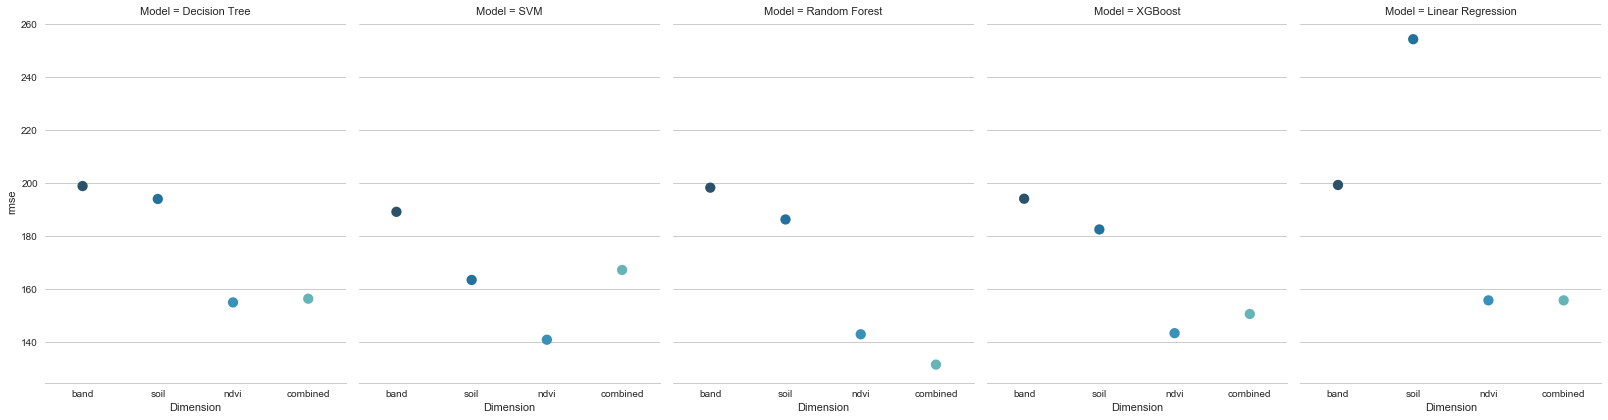

In [31]:
g = sns.factorplot(x="Dimension", y="rmse", col="Model", data=model,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

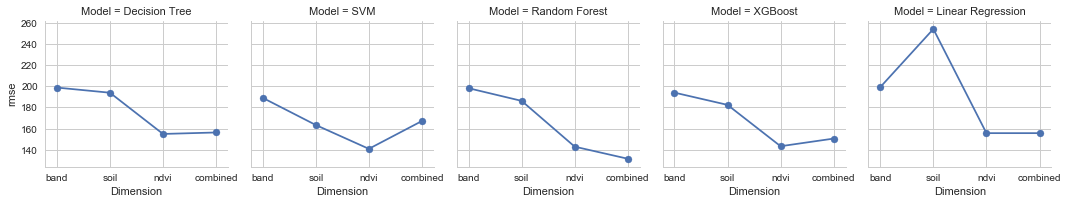

In [35]:
colors = ["#0088cc", "#ff7f0e"]
g = sns.FacetGrid(model, col="Model", palette=sns.color_palette(colors), margin_titles=True)
g.map(plt.scatter, "Dimension", 'rmse')
g.map(plt.plot, "Dimension", 'rmse')

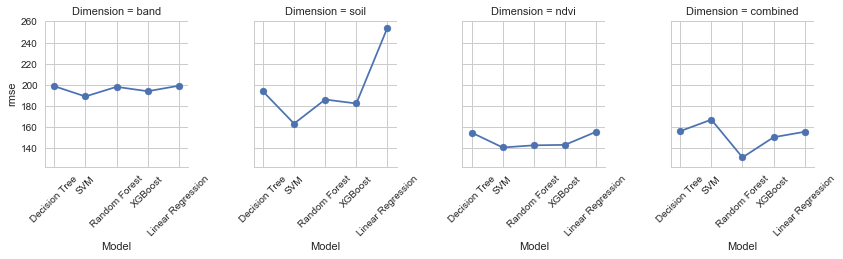

In [37]:
colors = ["#0088cc", "#ff7f0e"]
g = sns.FacetGrid(model, col="Dimension", palette=sns.color_palette(colors), margin_titles=True)
g.map(plt.scatter, "Model", 'rmse')
g.map(plt.plot, "Model", 'rmse')
g.set_xticklabels(rotation=45)